In [0]:
#module import
#modules have been given their own cell to avoid having to re-define network or
#perform other operations after terminating runtime sessions


#tensorflow 2.0 modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

#helper modules
import matplotlib.pyplot as plt

#dataset module
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
#data loaderrrrrrrrrrrrrrr

(imtrain, labtrain), (imtest, labtest) = datasets.cifar10.load_data()
#convert labels for cross-entropy
labtrain = to_categorical(labtrain)
labtest = to_categorical(labtest)
#normalize pixel values
imtrain, imtest = imtrain / 255.0, imtest / 255.0

#data augmentation :)
#datagen = ImageDataGenerator(rotation_range=5, width_shift_range=0.15, height_shift_range=0.15, horizontal_flip=True, fill_mode='nearest')

#run data augmentor
#train_sequence = datagen.flow(imtrain, labtrain, batch_size=64)

#labels do not inherently map to names, so we pre-define them to match a label vector
#doesn't inherently affect training, only for if we humans want to visualize
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#check to see if GPU is available
#print(tf.config.list_physical_devices('GPU'))

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
#create VGG model

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPool2D((2, 2), strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPool2D((2, 2), strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPool2D((2, 2), strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

In [12]:
#training loop!

#define a certain number of steps so we use all of our data
#steps = int(imtrain.shape[0] / 64) steps_per_epoch=steps, 

#compile
model.compile(optimizer='sgd', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

#train
history = model.fit(imtrain, labtrain, epochs=50, validation_data=(imtest, labtest))

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8380 - accuracy: 0.3263 - val_loss: 1.5887 - val_accuracy: 0.4134
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4955 - accuracy: 0.4578 - val_loss: 1.4310 - val_accuracy: 0.4771
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3310 - accuracy: 0.5206 - val_loss: 1.2131 - val_accuracy: 0.5635
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2057 - accuracy: 0.5683 - val_loss: 1.1628 - val_accuracy: 0.5828
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0963 - accuracy: 0.6092 - val_loss: 1.0350 - val_accuracy: 0.6332
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0025 - accuracy: 0.6464 - val_loss: 1.1011 - val_accuracy: 0.6178
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9316 - accuracy: 0.6719 - val_loss: 0.9124 - val_accuracy:

313/313 - 1s - loss: 0.6807 - accuracy: 0.8176


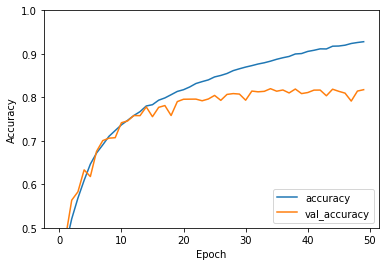

In [13]:
#performance evaluation cell

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(imtest,  labtest, verbose=2)